# Lista 1

# 1) Portas Lógicas

### Perceptron:

#### And
Parada - iterações //
amostras - 100
lr - 0.01
precisão 10^-6

#### Or
Parada - iterações
amostras - 100
lr - 0.05
precisão 10^-6

#### Xor
Parada - iterações
amostras - 100
lr - 0.01
precisão 10^-6

### Adaline:

#### And
Parada - iterações 
amostras - 100
lr - 0.7
precisão 10^-6

#### Or
Parada - iterações 
amostras - 100
lr - 0.001
precisão 10^-6

#### Xor
Parada - iterações 
amostras - 100
lr - 0.001
precisão 10^-6



## Standard Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
import sklearn as skl
import plotly.graph_objects as go

## Create Artificial Data

In [2]:
size = 200

zerone = pd.DataFrame()
zerone['x1']  = np.random.randint(0,2,size)
zerone['x2']  = np.random.randint(0,2,size)
zerone['And'] = np.logical_and(zerone.x1,zerone.x2)
zerone['Or']  = np.logical_or(zerone.x1,zerone.x2)
zerone['Xor'] = np.logical_xor(zerone.x1,zerone.x2)
zerone.head()

,x1,x2,And,Or,Xor
0,1,1,True,True,False
1,0,0,False,False,False
2,1,1,True,True,False
3,0,0,False,False,False
4,0,1,False,True,True


## Data preprocessing

In [3]:
#Boolean to int
zerone = zerone*1
zerone.head()

,x1,x2,And,Or,Xor
0,1,1,1,1,0
1,0,0,0,0,0
2,1,1,1,1,0
3,0,0,0,0,0
4,0,1,0,1,1


### Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(zerone[['x1','x2']],zerone[['And','Or','Xor']],
#                                                    test_size=0.30)

In [6]:
#y_test.reset_index(inplace=True)
#y_test.drop(['index'],axis = 1, inplace=True)

In [7]:
sep = 100
X_train = zerone.iloc[:sep,:2]
y_train = zerone.iloc[:sep,2:]

X_test = zerone.iloc[sep:,:2]
y_test = zerone.iloc[sep:,2:]

# Perceptron

In [43]:
class Perceptron(object):
    
    def __init__(self, Input, Output, Learning_Rate, epocs, precision):
        self.lr      = Learning_Rate
        self.d = Output.values
        #self.x       = pd.DataFrame(np.insert(Input.values, 0, -1, axis = 1), columns=['teta','x1','x2','x3'])
        self.x        = np.insert(Input.values, 0, -1, axis = 1)
        #self.weights = np.random.random_sample(self.x.shape[1])
        self.weights = np.random.normal(size=self.x.shape[1])
        self.epc     = epocs
        self.mse_    = []
        self.mse     = pd.DataFrame()
        self.precision = precision
        self.scape = False
        
    def train_w(self):
        for j in range(self.x.shape[0]):
            self.xi = self.x[j]
            self.di = self.d[j]
            self.predict_w()
            self.error = self.di-self.ui
            self.mse_.append(self.error)
            self.weights = self.weights + self.lr*self.xi*(self.di-self.yi)
                                    
    def predict_w(self):
        self.ui = np.dot(self.xi,self.weights.T)
        self.yi = ((self.ui>=0)*1)

        
    def train(self):
        self.iteration = 0
        while(self.scape == False):
            self.mse_    = []
            self.train_w()
            self.MSE()
            
            self.iteration += 1
            if self.iteration >= self.epc:
                self.scape = True
                
            if (self.iteration <0):   
                prec = np.absolute(self.mse.iloc[-1][0] - self.mse.iloc[-2][0])
                if (prec < self.precision):
                    self.scape = True
            
    def MSE(self):
        error = np.square(self.mse_).mean()
        error = pd.DataFrame([error])
        self.mse = pd.concat((self.mse,error))
            
    
    def predict(self,x):
        
        x.reset_index(inplace=True)
        x.drop(['index'],axis = 1, inplace=True)
        x = pd.concat((pd.DataFrame(np.ones(x.shape[0], dtype=np.int)*-1, columns=['teta']),x), axis = 1)
        self.x_p = x
        self.y_p = pd.DataFrame((self.weights*x).sum(axis=1),columns=['y'])
        return (self.y_p>0)*1

In [97]:
a = zerone[['And','Or','Xor']].replace(-1,0)
zerone[['And','Or','Xor']] = a

In [106]:
weights_perc = pd.DataFrame()
init_w_perc  = pd.DataFrame()
mse_perc     = pd.DataFrame()
ite_perc     = []

for i in np.arange(1,11,1):
    perc = Perceptron(X_train, y_train['Xor'], 0.05, 100, 10**(-12))
    init_w_perc = pd.concat((init_w_perc, pd.DataFrame(perc.weights).T))
    perc.train()
    weights_perc = pd.concat((weights_perc,pd.DataFrame(perc.weights).T))
    mse_perc[np.str(i)] = perc.mse.reset_index()[0]
    ite_perc.append(perc.iteration)
    
weights_perc.reset_index(inplace=True)
weights_perc.drop(['index'],axis = 1, inplace=True)

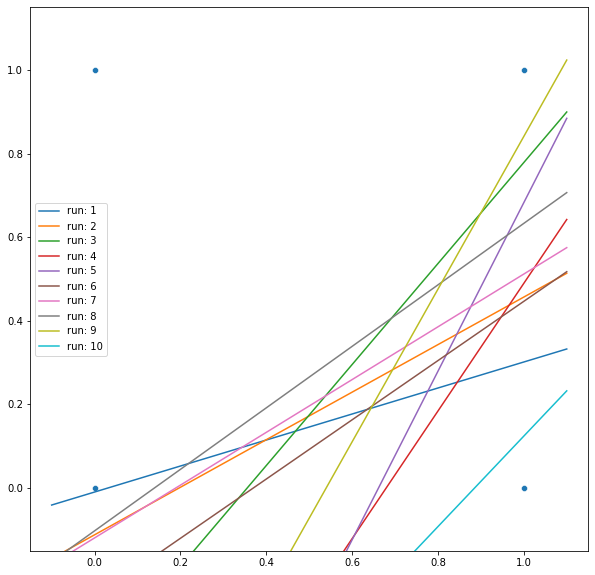

In [107]:
plt.figure(figsize = (10,10))
plt.xlim([-.15, 1.15])
plt.ylim([-.15, 1.15])
sns.scatterplot(x=[0,0,1,1],y=[0,1,0,1])
for i in range(weights_perc.shape[0]):
    x1 = np.arange(-0.1,1.1,0.1)
    w0 = weights_perc.iloc[i,0]
    w1 = weights_perc.iloc[i,1]
    w2 = weights_perc.iloc[i,2]
    y_g= ((w0-(w1*x1))/w2)
    plt.plot(x1,y_g, label='run: '+np.str(i+1))
    plt.legend(loc='best')

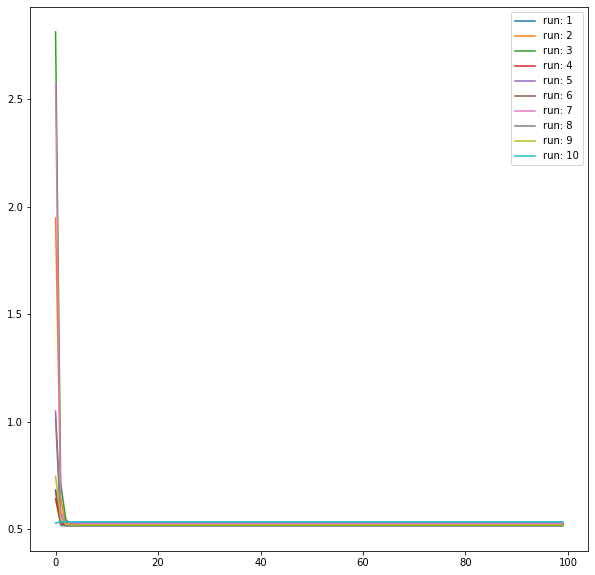

In [108]:
plt.figure(figsize = (10,10))
for i in range(mse_perc.shape[1]):
    x = np.arange(0,mse_perc.shape[0],1)
    plt.plot(x,mse_perc.iloc[:,i], label='run: '+np.str(i+1))
plt.legend(loc='best')

In [109]:
y = perc.predict(X_test)
y_test.reset_index(inplace=True)
y_test.drop(['index'],axis = 1, inplace=True)
print(classification_report(y_test['And'],y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      72.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      28.0

    accuracy                           0.00     100.0
   macro avg       0.00      0.00      0.00     100.0
weighted avg       0.00      0.00      0.00     100.0



C:\Users\thiag\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thiag\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adaline NN

In [86]:
a = zerone[['And','Or','Xor']].replace(0,-1)
zerone[['And','Or','Xor']] = a

sep = 100
X_train = zerone.iloc[:sep,:2]
y_train = zerone.iloc[:sep,2:]
X_test = zerone.iloc[sep:,:2]
y_test = zerone.iloc[sep:,2:]

In [55]:
class Adaline(object):
    
    def __init__(self, Input, Output, Learning_Rate, epocs, precision):
        self.lr      = Learning_Rate
        self.d = Output.values
        #self.x       = pd.DataFrame(np.insert(Input.values, 0, -1, axis = 1), columns=['teta','x1','x2','x3'])
        self.x        = np.insert(Input.values, 0, -1, axis = 1)
        #self.weights = np.random.random_sample(self.x.shape[1])
        self.weights = np.random.normal(size=self.x.shape[1])
        self.epc     = epocs
        self.mse_    = []
        self.mse     = pd.DataFrame()
        self.precision = precision
        self.scape = False

        
    def train_w(self):
        for i in np.arange(self.x.shape[0]):
            self.xi = self.x[i]
            self.di = self.d[i]
            self.ui = np.dot(self.xi,self.weights)
            #print(self.ui)
            #self.predict_w()
            self.error = self.di-self.ui
            self.weights += (self.lr*self.error)*self.xi
            self.mse_.append(self.error)
                                    
    def predict_w(self):
        self.ui = np.dot(self.xi,self.weights)
        
                                    
    def predict_w(self):
        self.ui = np.dot(self.weights[0],self.xi)

        
    def train(self):
        self.iteration = 0
        while(self.scape == False):
            self.mse_    = []
            self.train_w()
            self.MSE()
            
            self.iteration += 1
            if self.iteration >= self.epc:
                self.scape = True
                
            
            if (self.precision > ada.mse.iloc[-1][0]):   
                self.scape = True
            
    def MSE(self):
        error = np.square(self.mse_).mean()
        error = pd.DataFrame([error])
        self.mse = pd.concat((self.mse,error))
            
    
    def predict(self,x):
        
        self.x_p = np.insert(x.values, 0, -1, axis = 1)
        self.y_p = pd.DataFrame((self.weights*self.x_p).sum(axis=1),columns=['y'])
        return (self.y_p>=0)*1

In [38]:
weights_ada = pd.DataFrame()
init_w_ada  = pd.DataFrame()
mse_ada     = pd.DataFrame()
ite_ada     = []

for i in np.arange(1,11,1):
    ada = Adaline(X_train, y_train['Xor'], 0.01, 100, -1)
    init_w_ada = pd.concat((init_w_ada, pd.DataFrame(ada.weights).T))
    ada.train()
    weights_ada = pd.concat((weights_ada, pd.DataFrame(ada.weights).T))
    mse_ada[np.str(i)] = ada.mse.reset_index()[0]
    ite_ada.append(ada.iteration)
    
weights_ada.reset_index(inplace=True)
weights_ada.drop(['index'],axis = 1, inplace=True)

In [44]:
ada.d

array([ 1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1])

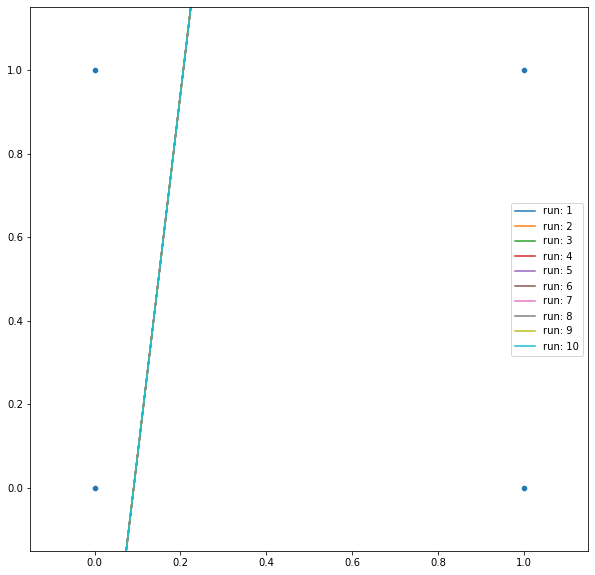

In [68]:
plt.figure(figsize = (10,10))
plt.xlim([-.15, 1.15])
plt.ylim([-.15, 1.15])
sns.scatterplot(x=[0,0,1,1],y=[0,1,0,1])
for i in range(weights_ada.shape[0]):
    x1 = np.arange(0,1.1,0.1)
    w0 = weights_ada.iloc[i,0]
    w1 = weights_ada.iloc[i,1]
    w2 = weights_ada.iloc[i,2]
    y_g= (w0-w1*x1)/w2
    plt.plot(x1,y_g, label='run: '+np.str(i+1))
    plt.legend(loc='best')

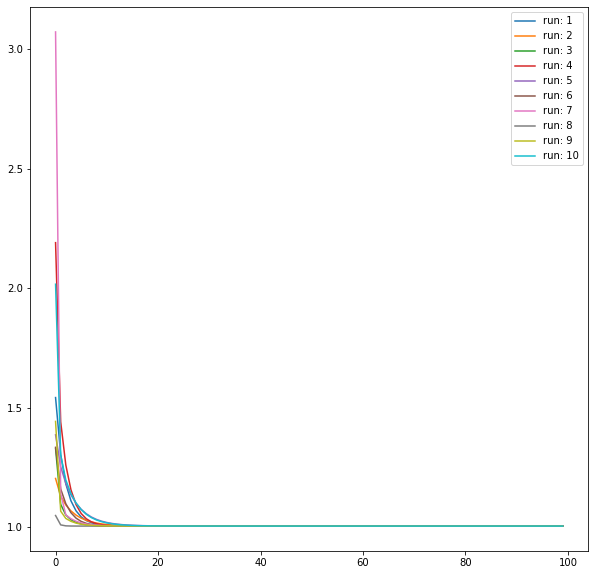

In [69]:
plt.figure(figsize = (10,10))
for i in range(mse_ada.shape[1]):
    x = np.arange(0,mse_ada.shape[0],1)
    plt.plot(x,mse_ada.iloc[:,i], label='run: '+np.str(i+1))
plt.legend(loc='best')

# 2) Problema do Livro

In [3]:
xls = pd.read_excel('F:\Desktop\8P\8P-2\Redes Neurais\Listas\Lista 1\Lista1_Tabela_3.6_3.3.xls')

In [4]:
X_train = xls[['x1','x2','x3']]
y_train = xls[['d']]

In [5]:
def norm_ada(x):
    xmin = x.min()
    xmax = x.max()
    x = np.array(x)
    x = -1 + (2*((x-xmin)/(xmax-xmin)))
    return x

In [6]:
def norm_perc(x):
    xmin = x.min()
    xmax = x.max()
    x = np.array(x)
    x = ((x-xmin)/(xmax-xmin))
    return x

In [24]:
X_train_perc = X_train.apply(norm_perc, axis=0, result_type='broadcast',raw=True)
y_train_perc = y_train.replace(-1,0)


In [8]:
X_train_ada = X_train.apply(norm_ada, axis=0, result_type='broadcast',raw=True)
y_train_ada = y_train

In [44]:
X_train_perc = X_train_ada
y_train_perc = y_train_ada

## Perceptron

In [45]:
weights_perc = pd.DataFrame()
init_w_perc  = pd.DataFrame()
mse_perc     = pd.DataFrame()
ite_perc     = []

for i in np.arange(1,6,1):
    perc = Perceptron(X_train_perc, y_train_perc, 0.001, 500, 0.000001)
    init_w_perc = pd.concat((init_w_perc, pd.DataFrame(perc.weights).T))
    perc.train()
    weights_perc = pd.concat((weights_perc,pd.DataFrame(perc.weights).T))
    mse_perc[np.str(i)] = perc.mse.reset_index()[0]
    ite_perc.append(perc.iteration)
    
weights_perc.reset_index(inplace=True)
weights_perc.drop(['index'],axis = 1, inplace=True)

In [46]:
init_w_perc.reset_index(inplace=True)
init_w_perc.drop(['index'],axis = 1, inplace=True)

In [47]:
pd.concat((init_w_perc,weights_perc),axis=1)

,0,1,2,3,0,1,2,3
0,-1.942647,-0.581519,1.511994,-0.483669,2.201353,0.265373,2.775245,-1.218671
1,0.572628,1.429543,1.418143,0.006850,2.342628,0.941552,3.110111,-1.851514
2,0.544254,0.473740,0.571310,0.040678,1.979254,0.452152,2.538434,-1.294423
3,-0.423148,-0.403913,0.833133,-0.035933,1.937852,0.153601,2.427441,-0.998805
4,-0.978959,-0.987478,0.723069,-1.109570,2.050041,0.288158,2.604227,-1.347126


In [48]:
ite_perc

[500, 500, 500, 500, 500]

In [49]:
weights_perc

,0,1,2,3
0,2.201353,0.265373,2.775245,-1.218671
1,2.342628,0.941552,3.110111,-1.851514
2,1.979254,0.452152,2.538434,-1.294423
3,1.937852,0.153601,2.427441,-0.998805
4,2.050041,0.288158,2.604227,-1.347126


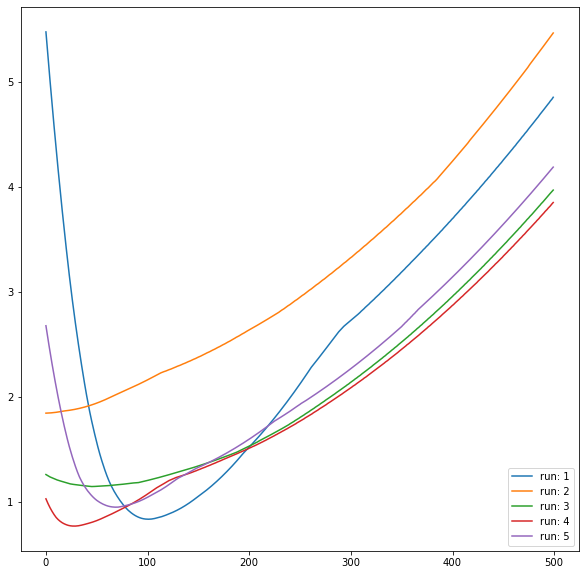

In [50]:
plt.figure(figsize = (10,10))
for i in range(mse_perc.shape[1]):
    x = np.arange(0,mse_perc.shape[0],1)
    plt.plot(x,mse_perc.iloc[:,i], label='run: '+np.str(i+1))
plt.legend(loc='best')

In [51]:
tabela = table()
tabela[[1,2,3]] = tabela[[1,2,3]].apply(norm_perc, axis=0, result_type='broadcast',raw=True)

In [52]:
tabela['y1'] = np.dot(tabela[[0,1,2,3]],np.array(weights_perc.iloc[0]))
tabela['y2'] = np.dot(tabela[[0,1,2,3]],np.array(weights_perc.iloc[1]))
tabela['y3'] = np.dot(tabela[[0,1,2,3]],np.array(weights_perc.iloc[2]))
tabela['y4'] = np.dot(tabela[[0,1,2,3]],np.array(weights_perc.iloc[3]))
tabela['y5'] = np.dot(tabela[[0,1,2,3]],np.array(weights_perc.iloc[4]))
tabela

,0,1,2,3,y1,y2,y3,y4,y5
0,-1.0,0.570585,0.243391,0.694902,-2.221323,-2.335040,-2.002927,-1.953464,-2.187897
1,-1.0,0.413549,1.000000,0.636498,-0.092046,-0.021625,-0.077730,-0.082627,-0.184090
2,-1.0,0.821610,0.598067,0.670581,-1.140755,-0.950575,-0.957622,-1.029659,-1.159141
3,-1.0,1.000000,0.956012,1.000000,-0.501484,-0.279287,-0.394751,-0.462394,-0.619336
4,-1.0,0.767397,0.769827,0.741123,-0.764435,-0.598038,-0.637446,-0.691508,-0.822492
5,-1.0,0.444678,0.932419,0.344303,0.084752,0.338505,0.143020,0.049952,0.042508
6,-1.0,0.849280,0.308485,0.719062,-1.996157,-1.914918,-1.742952,-1.776776,-1.970616
7,-1.0,0.448212,0.867609,0.462505,-0.238223,-0.078586,-0.172901,-0.224888,-0.284485
8,-1.0,0.189932,0.706794,0.538904,-0.846172,-0.963379,-0.796796,-0.731239,-0.880631
9,-1.0,0.000000,0.000000,0.000000,-2.201353,-2.342628,-1.979254,-1.937852,-2.050041


## Adaline

In [56]:
weights_ada = pd.DataFrame()
init_w_ada  = pd.DataFrame()
mse_ada     = pd.DataFrame()
ite_ada     = []

for i in np.arange(1,6,1):
    ada = Adaline(X_train_ada, y_train_ada, 0.01, 500, 0.000001)
    init_w_ada = pd.concat((init_w_ada, pd.DataFrame(ada.weights).T))
    ada.train()
    weights_ada = pd.concat((weights_ada, pd.DataFrame(ada.weights).T))
    mse_ada[np.str(i)] = ada.mse.reset_index()[0]
    ite_ada.append(ada.iteration)
    
weights_ada.reset_index(inplace=True)
weights_ada.drop(['index'],axis = 1, inplace=True)

In [57]:
init_w_ada.reset_index(inplace=True)
init_w_ada.drop(['index'],axis = 1, inplace=True)

In [58]:
pd.concat((init_w_ada,weights_ada),axis=1)

,0,1,2,3,0,1,2,3
0,0.591871,-2.170654,-0.705437,0.981314,0.032998,2.730675,1.540285,-3.344358
1,0.134552,0.626593,1.451664,0.122448,0.031660,2.846735,1.564812,-3.465414
2,-1.461214,0.594040,-0.206352,1.971785,0.032395,2.783006,1.551344,-3.398942
3,-0.257758,-0.336433,0.050425,1.242229,0.032439,2.779168,1.550533,-3.394939
4,0.409687,0.237403,-0.794880,1.005681,0.032239,2.796496,1.554195,-3.413013


In [59]:
init_w_ada

,0,1,2,3
0,0.591871,-2.170654,-0.705437,0.981314
1,0.134552,0.626593,1.451664,0.122448
2,-1.461214,0.594040,-0.206352,1.971785
3,-0.257758,-0.336433,0.050425,1.242229
4,0.409687,0.237403,-0.794880,1.005681


In [60]:
ite_ada

[500, 500, 500, 500, 500]

In [61]:
weights_ada

,0,1,2,3
0,0.032998,2.730675,1.540285,-3.344358
1,0.031660,2.846735,1.564812,-3.465414
2,0.032395,2.783006,1.551344,-3.398942
3,0.032439,2.779168,1.550533,-3.394939
4,0.032239,2.796496,1.554195,-3.413013


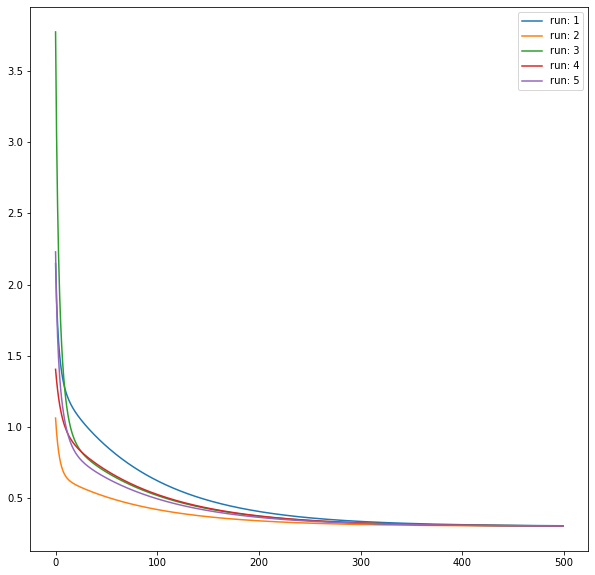

In [62]:
plt.figure(figsize = (10,10))
for i in range(mse_ada.shape[1]):
    x = np.arange(0,mse_ada.shape[0],1)
    plt.plot(x,mse_ada.iloc[:,i], label='run: '+np.str(i+1))
plt.legend(loc='best')

In [63]:
tabela = table()
tabela[[1,2,3]] = tabela[[1,2,3]].apply(norm_ada, axis=0, result_type='broadcast',raw=True)

In [65]:
tabela['y1'] = np.dot(tabela[[0,1,2,3]],np.array(weights_ada.iloc[0]))
tabela['y2'] = np.dot(tabela[[0,1,2,3]],np.array(weights_ada.iloc[1]))
tabela['y3'] = np.dot(tabela[[0,1,2,3]],np.array(weights_ada.iloc[2]))
tabela['y4'] = np.dot(tabela[[0,1,2,3]],np.array(weights_ada.iloc[3]))
tabela['y5'] = np.dot(tabela[[0,1,2,3]],np.array(weights_ada.iloc[4]))
tabela

,0,1,2,3,y1,y2,y3,y4,y5
0,-1.0,0.141171,-0.513218,0.389805,-1.741655,-1.783708,-1.760617,-1.759226,-1.765505
1,-1.0,-0.172901,1.000000,0.272997,0.122151,0.094901,0.109864,0.110765,0.106697
2,-1.0,0.643220,0.196134,0.341162,0.884561,0.924063,0.902373,0.901066,0.906964
3,-1.0,1.000000,0.912024,1.000000,0.758095,0.776807,0.766532,0.765914,0.768707
4,-1.0,0.534795,0.539653,0.482247,0.645765,0.664029,0.654000,0.653396,0.656123
5,-1.0,-0.110643,0.864838,-0.311395,2.038383,2.085788,2.059758,2.058190,2.065268
6,-1.0,0.698560,-0.383030,0.438125,-0.180680,-0.160698,-0.171670,-0.172331,-0.169347
7,-1.0,-0.103575,0.735219,-0.074990,1.067412,1.083840,1.074819,1.074276,1.076729
8,-1.0,-0.620136,0.413587,0.077808,-1.349565,-1.419475,-1.381087,-1.378775,-1.389213
9,-1.0,-1.000000,-1.000000,-1.000000,-0.959600,-0.977793,-0.967803,-0.967201,-0.969918


## Data plot

In [32]:
def table():
    bias = np.ones(10)*-1
    x1 = [-0.3665, -0.7842, 0.3012, 0.7757, 0.1570, -0.7014, 0.3748, -0.6920, -1.3790, -1.8842]
    x2 = [0.0620, 1.1267, 0.5611, 1.0648, 0.8028, 1.0316, 0.1536, 0.9404, 0.7141, -0.2805]
    x3 = [5.9891, 5.5912, 5.8234, 8.0677, 6.3040, 3.6005, 6.1537, 4.4058, 4.9263, 1.2548]
    return pd.DataFrame([bias,x1,x2,x3]).T